In [1]:
# Imorting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression # for algorithm of model
from sklearn.model_selection import train_test_split # for data validation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### Reading the file

In [2]:
titanic_df=pd.read_csv("C:\\Users\\HP\\Desktop\\DATASCIENCE\\DATASETS\\titanic.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The datset contain object and numeric datatype

Column Age has 177 missing values

Column Cabin has 687 missing values

Column Embarked has 2 missing values

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
titanic_df.describe() #Shows statistical distribution for each column

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Pre Processing

#### Finding duplicate values

In [7]:
for col in titanic_df:
    duplicate_count=titanic_df[col].duplicated().sum()
    print(f"column {col}- {duplicate_count}")

column PassengerId- 0
column Survived- 889
column Pclass- 888
column Name- 0
column Sex- 889
column Age- 802
column SibSp- 884
column Parch- 884
column Ticket- 210
column Fare- 643
column Cabin- 743
column Embarked- 887


#### Removing Null values

In [8]:
nullcount=titanic_df.isnull().sum()
print(nullcount)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
titanic_df.fillna({
    'Age': titanic_df['Age'].mean(),
    'Embarked': titanic_df['Embarked'].mode()[0]
}, inplace=True)


In [10]:
titanic_df.drop('Cabin', axis=1, inplace=True)


In [11]:
nullcount=titanic_df.isnull().sum()
print(nullcount)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [12]:
titanic_df['Sex_male'] = pd.get_dummies(titanic_df['Sex'], drop_first=True)
titanic_df['Sex_male'] = titanic_df['Sex_male'].astype(int)
embarked_mapping = {'C': 1, 'Q': 2, 'S': 3}
titanic_df['Embarked_mapped'] = titanic_df['Embarked'].map(embarked_mapping)


### Heatmap for Pclass, Age and Fare

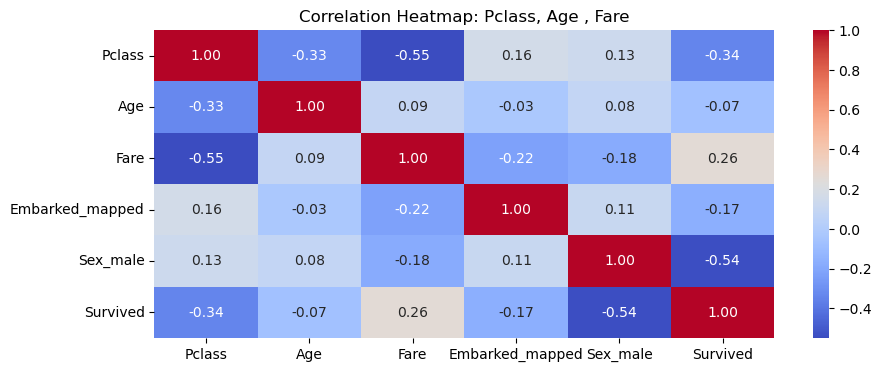

In [13]:

# Selecting columns
cols = ['Pclass', 'Age', 'Fare','Embarked_mapped', 'Sex_male','Survived']
corr_matrix = titanic_df[cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Pclass, Age , Fare')
plt.show()


### Correlation Heatmap Insights

1. **Weak Positive Correlation** between **Age** and **Fare**  — suggesting age has little to no influence on ticket price.

2. **Moderate Negative Correlation** between **Pclass** and **Age**  — indicating that passengers in 1st class tend to be older compared to those in 2nd and 3rd class.

3. **Strong Negative Correlation** between **Pclass** and **Fare**  — confirming that higher-class tickets (1st class) cost more than lower-class ones, i.e., fare increases from 3rd → 2nd → 1st class.

4. **Strong Negative Correlation** between **Sex (male)** and **Survived**  — showing that males were significantly less likely to survive than females.

5. **Weak Positive Correlation** between **Fare** and **Survived** — indicating passengers who paid more had slightly better survival chances.

6. **Weak to Moderate Negative Correlation** between **Embarked** and **Fare**  — suggesting that passengers from certain ports  tended to pay lower fares than others.



### Passenger count on tha basis of Gender

Text(0.5, 1.0, 'Passenger count on titanic')

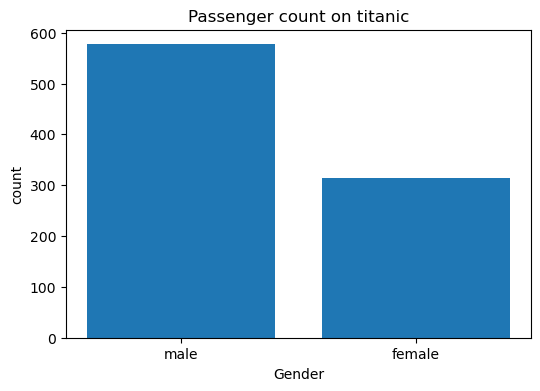

In [14]:
#plotting graph
gender_count=titanic_df['Sex'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(gender_count.index,gender_count.values)
plt.xlabel("Gender")
plt.ylabel("count")
plt.title("Passenger count on titanic")




The above Countplot shows the passenger count on the basis of gender
1. Male: 577
2. Female: 314

### Total Survivors on the basis of Gender

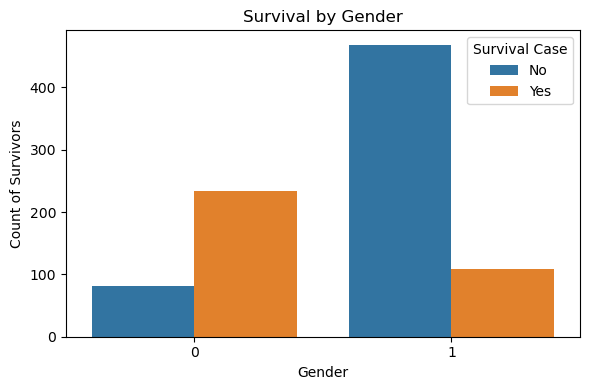

In [15]:

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Sex_male', hue='Survived', data=titanic_df)
plt.title('Survival by Gender')
plt.xlabel("Gender")
plt.ylabel("Count of Survivors")
plt.legend(title='Survival Case', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


This bar graph shows the number of suvived passengers on the basis of gender.

1. **Male**: Survived- 109.  Dead- 468

2. **Female**: Survived-233. Dead-81

Hence, female passengers had a significantly higher survival rate than male passengers

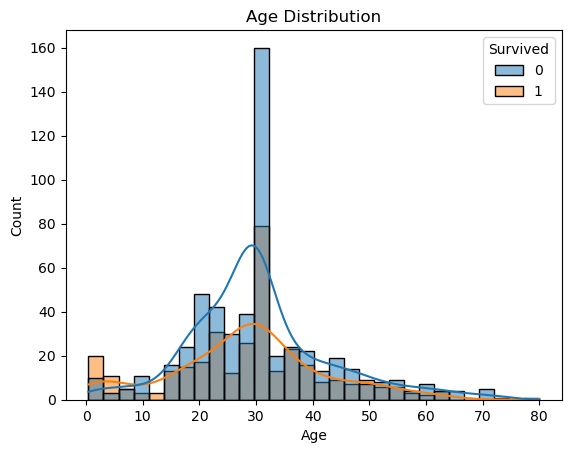

In [16]:
#Plotting Age Distribution 
sns.histplot(data=titanic_df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


This histogram shows the distribution of passengers’ ages separated by survival status

Younger passengers have a higher density in the survived group, indicating better survival chances for the young.
The non-survived group shows a wider distribution of middle-aged and older passengers

### Total survivors per Pclass

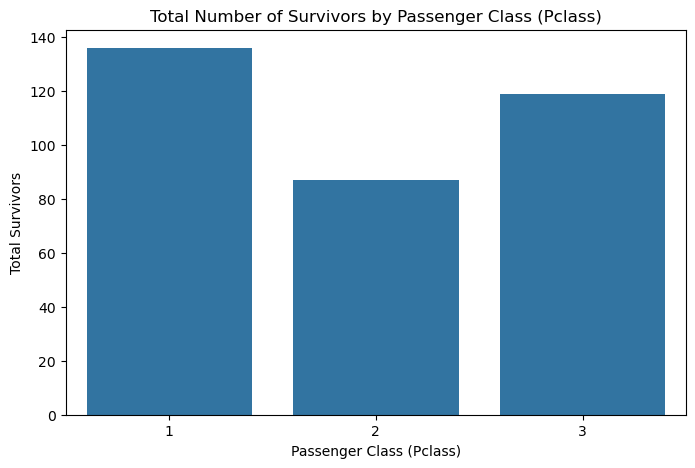

In [17]:

# Calculate total survivors per Pclass
total_survivors = titanic_df[titanic_df['Survived'] == 1]['Pclass'].value_counts().sort_index()

# Plot total survivors by Pclass
plt.figure(figsize=(8, 5))
sns.barplot(x=total_survivors.index, y=total_survivors.values)
plt.title('Total Number of Survivors by Passenger Class (Pclass)')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Total Survivors')
plt.show()


This bar plot shows the total survivors on the basis of their passenger class:

1st Class passengers have the highest survivors: 136

3nd Class passengers have second highest sruvivors: 119 

2rd Class passengers have the lowest survivors:87 

### Percentage of Passenger Survived on the basis of their Embarked Port

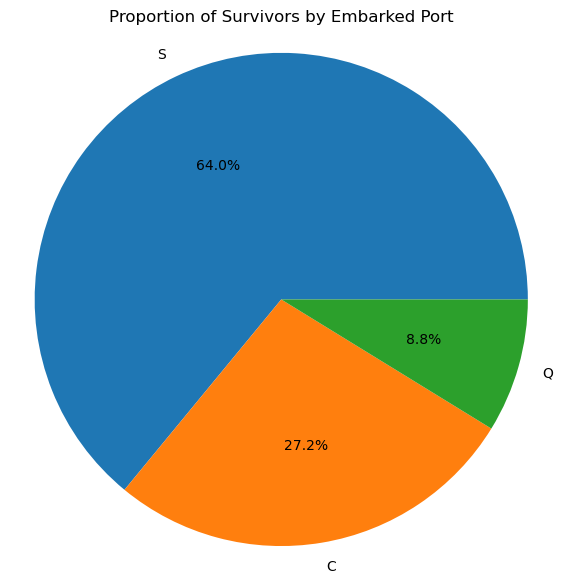

In [18]:
# Calculating total survivors per Embarked port
survivors_by_port = titanic_df[titanic_df['Survived'] == 1]['Embarked'].value_counts()

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(survivors_by_port, labels=survivors_by_port.index, autopct='%1.1f%%')
plt.title('Proportion of Survivors by Embarked Port')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
plt.show()

#### The above Pie chart shows that the total percentage of survivors from each port
Cherbourg: 27.2.0%

Queenstown: 8.8%

Southampton: 64%

Hence Passengers who embarked from Cherbourg has survived the most

# Model Training

In [19]:
x=titanic_df[['Age','Pclass','Sex_male','Embarked_mapped']]

In [20]:
y=titanic_df['Survived']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
model=LogisticRegression(max_iter=10000) #10000 times algorithm read by model
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [23]:
y_pred=model.predict(x_test)

In [24]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy=",accuracy)

conf_mat=confusion_matrix(y_test,y_pred)
print("\n Confusion matrix \n",conf_mat)
class_report=classification_report(y_test,y_pred)
print("\nClassification_Report\n",class_report)

Accuracy= 0.7947761194029851

 Confusion matrix 
 [[131  26]
 [ 29  82]]

Classification_Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.76      0.74      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



In [26]:
user_input = {
    'Age': [float(input("Enter Age "))],
    'Pclass': [int(input("Enter Passenger class "))],
    'Sex_male': [int(input("Enter 1 for Male, 0 for Female: "))],
    'Embarked_mapped': [int(input("Enter Embarked: 1 for Cherbourg, 2 for Queenstown, 3 for Southampton: "))]
}

user_df = pd.DataFrame(user_input)

Enter Age  32
Enter Passenger class  2
Enter 1 for Male, 0 for Female:  1
Enter Embarked: 1 for Cherbourg, 2 for Queenstown, 3 for Southampton:  2


In [27]:
pred_user=model.predict(user_df)
print(pred_user)

[0]


### Titanic Data Analysis Summary

- **Survival by Gender:**  
  The bar graph indicates that **female passengers had a significantly higher survival rate** compared to males.  
  - Males: 109 survived, 468 died  
  - Females: 233 survived, 81 died

- **Age Distribution and Survival:**  
  The histogram shows that **younger passengers had better survival chances**, with a higher density in the survived group. The non-survived group consists mainly of middle-aged and older passengers.

- **Survival by Passenger Class:**  
  Passenger class influenced survival rates:  
  - 1st Class had the highest number of survivors (136)  
  - 3rd Class came next with 119 survivors  
  - 2nd Class had the lowest survivors (87)

- **Survival by Embarkation Port:**  
  The pie chart displays the percentage of survivors by embarkation port:  
  - Cherbourg: 27.2%  
  - Queenstown: 8.8%  
  - Southampton: 64%  
  Passengers embarking from **Cherbourg showed the highest survival rate** proportionally.

- **Predictive Model:**  
  Using features like Age, Passenger Class, Gender, and Embarkation Port, the predictive model achieved an **accuracy of 79%** in classifying survival outcomes.
